### Bhagyashree Deshpande

# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing,metrics
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.shape

(400, 11)

In [5]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Making necessary EDA for the model

In [8]:
data[data.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
data['salestype'] = (data['Sales'] > 7.49) * 1
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [11]:
label_encoder = preprocessing.LabelEncoder()
data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"])
data["Urban"] = label_encoder.fit_transform(data["Urban"])
data["US"] = label_encoder.fit_transform(data["US"])

In [12]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [14]:
X = data.iloc[:,1:9]
y = data.iloc[:,-1]

In [20]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

### Building the Random Forest Classifier model

In [32]:
model = RandomForestClassifier(n_estimators=120, max_features=4)
result = cross_val_score(model, X, y, cv=kfold)
print(result.mean())

0.8125


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [34]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=120)

In [35]:
y_pred = model.predict(X_train)

In [38]:
print('Accuracy :', metrics.accuracy_score(y_train, y_pred))

Accuracy : 1.0


In [37]:
y_pred_2 = model.predict(X_test)

In [39]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_2))

Accuracy : 0.8166666666666667


In [40]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=120, max_features=4)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [42]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.783333
1,2,1.0,0.816667
2,3,1.0,0.800000
3,4,1.0,0.808333
4,5,1.0,0.800000
5,6,1.0,0.775000
6,7,1.0,0.800000
7,8,1.0,0.783333
8,9,1.0,0.775000


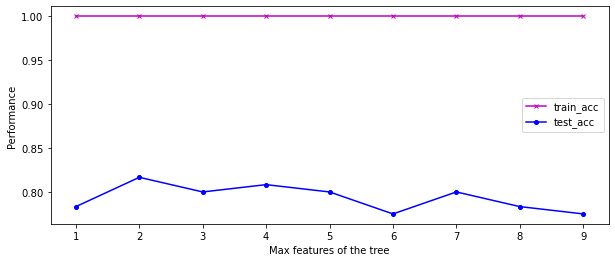

In [43]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()

plt.plot(data['max_features'], data['train_acc'], marker = 'x', markersize=4, color='m')
plt.plot(data['max_features'], data['test_acc'], marker = 'o', markersize=4, color='b')
ax.set_xticks(np.arange(1,10))

plt.legend(labels)
plt.xlabel('Max features of the tree')
plt.ylabel('Performance');

## Conclusion

From the plot above max features that contributes to the cloth manufacturing company is 2 with the accuracy of 81.66%. Thus, it is a good model to classify the segments or attributes in the cloth manufacturing which causes high sale.

## =========================================================================

# Use Random Forest to prepare a model on fraud data 
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
%matplotlib inline

from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [4]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Data Understanding

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.shape

(600, 6)

In [7]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Making necessary EDA for the model

In [10]:
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [11]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status']) 
data['Urban'] = label_encoder.fit_transform(data['Urban']) 

In [12]:
data["Taxable.Income"] = (data["Taxable.Income"] > 30000) * 1

In [13]:
X = data.drop(axis=0, columns="Taxable.Income")
y = data["Taxable.Income"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Building the Random Forest Classifier Model

In [16]:
model = RandomForestClassifier(n_estimators=120, max_features=3)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=120)

In [17]:
y_pred = model.predict(X_train)

In [18]:
print("Accuracy :", metrics.accuracy_score(y_train,y_pred))

Accuracy : 1.0


In [19]:
y_pred_2 = model.predict(X_test)

In [20]:
print("Accuracy :", metrics.accuracy_score(y_test,y_pred_2))

Accuracy : 0.7555555555555555


In [21]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model = RandomForestClassifier(n_estimators=120, max_features=3)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [22]:
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.000000,0.766667
1,2,1.000000,0.766667
2,3,1.000000,0.777778
3,4,1.000000,0.772222
4,5,1.000000,0.766667
5,6,1.000000,0.755556
6,7,1.000000,0.772222
7,8,0.997619,0.761111
8,9,1.000000,0.766667


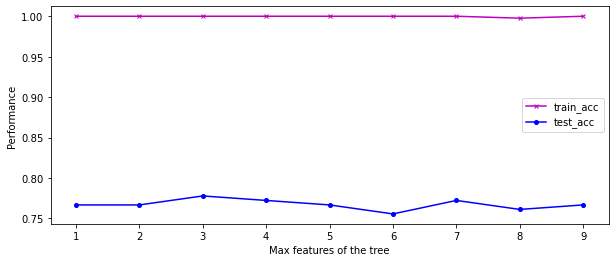

In [23]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()

plt.plot(data['max_features'],data['train_acc'], marker = 'x', markersize=4, color = 'm')
plt.plot(data['max_features'], data['test_acc'], marker = 'o', markersize=4, color = 'b')
ax.set_xticks(np.arange(1,10))

plt.legend(labels)
plt.xlabel('Max features of the tree')
plt.ylabel('Performance');

## Conclusion

From the above plot, max features that contributes is 3 with the accuracy of 77.77%. Thus, it is a good model to classify which accounts are risky and how many are good.